# Wellcome to Marina Luque's data cleaning pipeline

### 1. Set working directory, load modules and set global ipynb properties¶

In [43]:
!pwd
!ls
!cd scr
!ls

/Users/Marina/AMAYA_UBUNTU/PY_PROJECTS/IRONHACK/PROJECTS/Data_Sharkleaner/scr
__pycache__          dataanalysis_fun1.py mlg_cleaning.ipynb
/bin/bash: line 0: cd: scr: No such file or directory
__pycache__          dataanalysis_fun1.py mlg_cleaning.ipynb


In [14]:
import os
os.chdir("/Users/Marina/AMAYA_UBUNTU/PY_PROJECTS/IRONHACK/PROJECTS/Data_Sharkleaner/scr")
current_directory = os.getcwd()
print(current_directory)

/Users/Marina/AMAYA_UBUNTU/PY_PROJECTS/IRONHACK/PROJECTS/Data_Sharkleaner/scr


In [15]:
!ls

dataanalysis_fun1.py mlg_cleaning.ipynb


In [38]:
import pandas as pd
import numpy as np
import re

np.random.seed(42)
pd.set_option('display.max_columns', None) # mostrar todas las columnas

# pa pintar 
# para que salga el grafico como output en jupyter
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore') # ignorar warnings

import pylab as plt   # import matplotlib.pyplot as plt
import seaborn as sns



#### <span style="color: #e74c3c"><b>  IMPORT MY OWN FUNCTIONS

In [218]:
import dataanalysis_fun1 as mlg
#del mlg
#import dataanalysis_fun1 as mlg

#### When I make modifications in the functions, I need to detatch the module and load it again!

In [219]:
import importlib
import dataanalysis_fun1  # Import the module
importlib.reload(dataanalysis_fun1)  # Reload the module

<module 'dataanalysis_fun1' from '/Users/Marina/AMAYA_UBUNTU/PY_PROJECTS/IRONHACK/PROJECTS/Data_Sharkleaner/scr/dataanalysis_fun1.py'>

### 2. Load raw data frame

In [365]:
sharks_raw = pd.read_csv('../data/attacks.csv', encoding ="latin1")
sharks = sharks_raw.copy()

### 3. Explore basic properties

In [366]:
print("\n")
display(sharks.shape)
print("\n")
sharks.info()

(25723, 24)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-nul

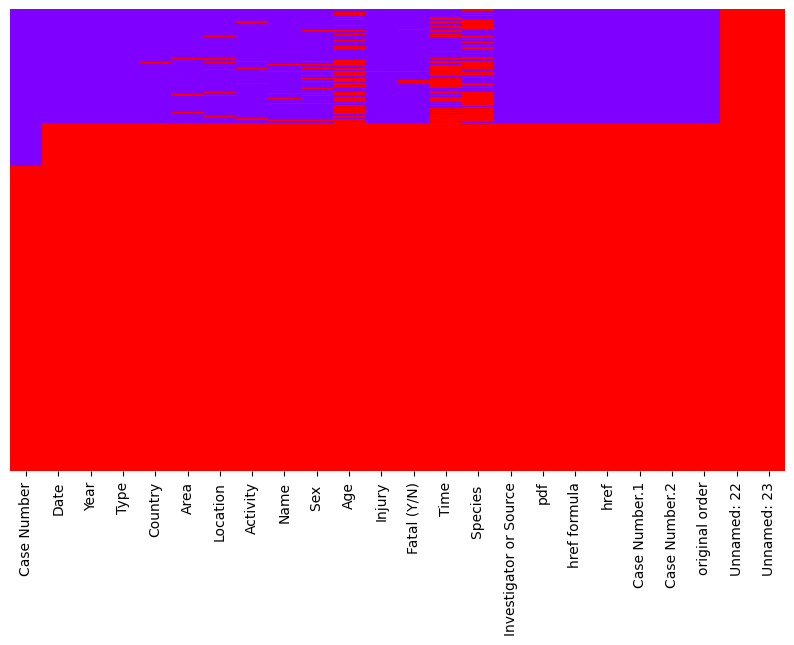

In [367]:
mlg.na_heatmap(sharks)

## 4. Cleaning steps

### 4.0 Remame columns if neccessary

I replaced the column name "se" for "sex"

In [375]:
sharks=mlg.colnnam_clean(sharks)

sharks.rename(columns={"se": "sex"}, inplace=True)
sharks.head()

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_y_n,time,specie,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed_22,unnamed_23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


### 4.1 NA'S per row - drop rows with 100% of NA's

In [379]:
sharks1 = sharks.copy()

NA_sum_row = mlg.na_absperc(sharks.T)
display(NA_sum_row)

NA100_index = NA_sum_row["perc_NA"]==100
NA100_index = NA100_index[NA100_index==True]
print("\n")
print(len(NA100_index), "rows with 100% NA values!!")


sharks1.drop(index = NA100_index.index, inplace=True)

sharks1.reset_index(drop=True, inplace=True)

print(f'''
    {len(sharks)} minus {len(NA100_index)}  equals  {len(sharks1)} -- {len(sharks) - len(NA100_index) == len(sharks1)}''')


,abs_NA,perc_NA
12861,24,100.000000
11352,24,100.000000
11338,24,100.000000
11339,24,100.000000
11340,24,100.000000
...,...,...
3046,2,8.333333
1386,2,8.333333
1387,2,8.333333
1388,2,8.333333




17020 rows with 100% NA values!!

    25723 minus 17020  equals  8703 -- True


,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_y_n,time,specie,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed_22,unnamed_23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


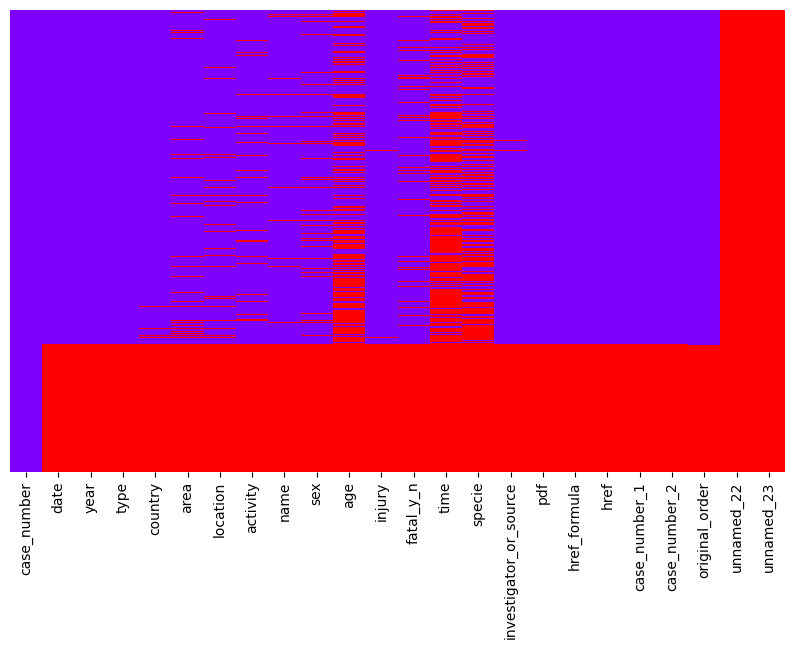



When excluding 'case number' column, we find that many rows are actually 100% NAs.
I will drop these rows too!!
    


In [380]:
mlg.na_heatmap(sharks1)
print('''

When excluding 'case number' column, we find that many rows are actually 100% NAs.
I will drop these rows too!!
    ''' )


In [382]:
sharks2 = sharks1.copy()

NA_sum_row = mlg.na_absperc(sharks1.T) 
display(NA_sum_row)

NA23_index = NA_sum_row["abs_NA"] == 23 # select rows with 23 NA's out of the total 24 columns !!
NA23_index = NA23_index[NA23_index == True]
print("\n")
print(len(NA23_index), "rows with 100% NA values (excluding 'Case number' column!!")


sharks2.drop(index = NA23_index.index, inplace=True)
sharks2.reset_index(drop=True, inplace=True)

print(f'''
    {len(sharks1)} minus {len(NA23_index)}  equals  {len(sharks2)} -- {len(sharks1) - len(NA23_index) == len(sharks2)}''')


,abs_NA,perc_NA
8702,23,95.833333
7123,23,95.833333
7130,23,95.833333
7129,23,95.833333
7128,23,95.833333
...,...,...
3054,2,8.333333
3050,2,8.333333
3048,2,8.333333
1446,2,8.333333




2394 rows with 100% NA values (excluding 'Case number' column!!

    8703 minus 2394  equals  6309 -- True


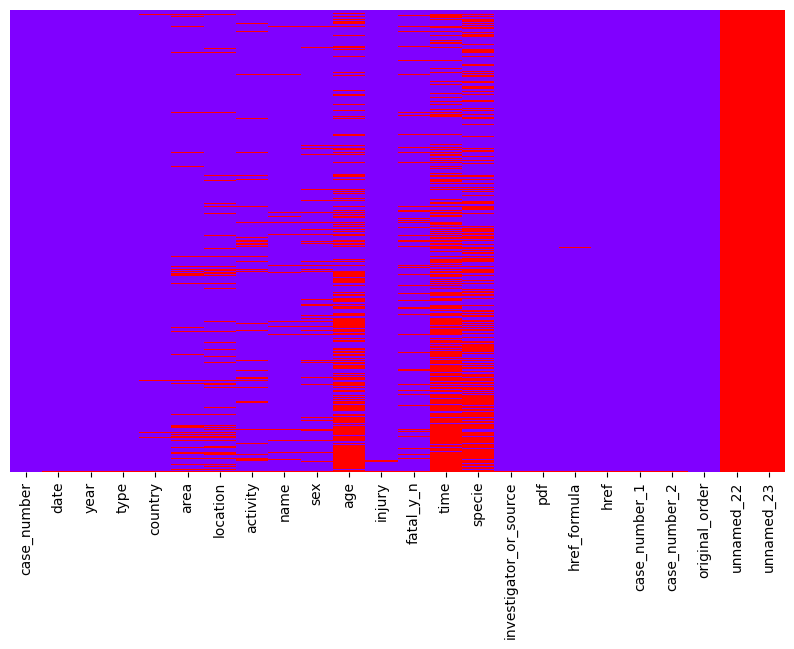

percentile 90 =  25.0

After checking the NA percentage distribution, 
I decided to drop rows with more than 40% of NAS


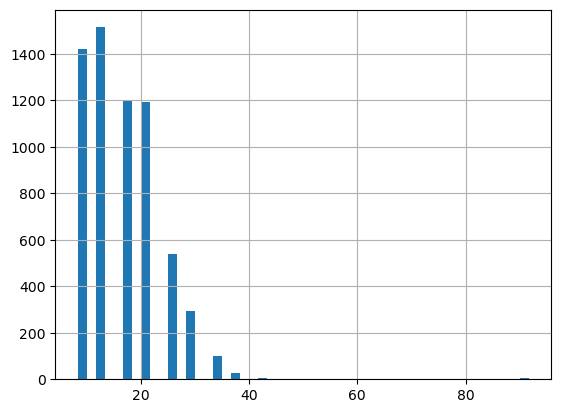

In [383]:
mlg.na_heatmap(sharks2)

mlg.na_absperc(sharks2.T)["perc_NA"].hist(bins=50);

mlg.na_absperc(sharks2.T)["perc_NA"].describe()

print("percentile 90 = ", mlg.na_absperc(sharks2.T)["perc_NA"].quantile(0.9))

print('''
After checking the NA percentage distribution, 
I decided to drop rows with more than 40% of NAS''')

In [385]:
sharks3 = sharks2.copy()

NA_sum_row = mlg.na_absperc(sharks2.T)

NA40_index = NA_sum_row["perc_NA"]>40
NA40_index = NA40_index[NA40_index==True]
print("\n")
print(len(NA40_index), "rows with more than 40% NA values!!")


sharks3.drop(index = NA40_index.index, inplace=True)
sharks3.reset_index(drop=True, inplace=True)

print(f'''
    {len(sharks2)} minus {len(NA40_index)}  equals  {len(sharks3)} -- {len(sharks2) - len(NA40_index) == len(sharks3)}''')




14 rows with more than 40% NA values!!

    6309 minus 14  equals  6295 -- True


### 4.2 Check and drop duplicated rows

In [387]:
display(any(sharks3.duplicated()))

print(f'The dataframe has {display(sharks3.duplicated().sum())} duplicated rows')

False

0

The dataframe has None duplicated rows


### Investigate the columns by their unique_count/freq ratio

Top rows: indicate there are MANY LEVELS with very LOW FREQ:

 * 'case_number' should be an identifier and not present duplicated values!!!

 * That behavior is expected for 'case_number' and 'date' data types
     
 * According to wikipedia, there only exists 195 countries in the world
    but this column contains 212 unique values!!!!
    Check in the next cell bellow.
         
 * Same suspicion wiht "species" or "activity"
 
         
Bottom rows: indicate there is ONE LEVEL with EXCESIVE FREQ:

 * "unnamed_22" and "unnamed_23" should be deleted in a real job task
    
 * "case_number_1" and "case_number_2" should also be deleted cause they seem copies of "case_number"
   
 * For the moment, I will also ignore "href" and "href_formula" cause they seems uninformative links

In [407]:
display(mlg.categ_summ(sharks3))

,count,unique,top,freq,unicount_ratio,resto_abs,resto_per
case_number,6294,6278,1920.00.00.b,2,0.997458,6292,99.968224
date,6295,5427,1957,11,0.862113,6284,99.825258
type,6291,8,Unprovoked,4593,0.001272,1698,26.990939
country,6246,212,USA,2229,0.033942,4017,64.31316
area,5847,825,Florida,1037,0.141098,4810,82.264409
location,5761,4107,"New Smyrna Beach, Volusia County",163,0.712897,5598,97.17063
activity,5757,1531,Surfing,971,0.265937,4786,83.133577
name,6090,5229,male,549,0.858621,5541,90.985222
sex,5736,6,M,5093,0.001046,643,11.209902
age,3471,157,17,154,0.045232,3317,95.563238


### 4.3 Investigate the relationship between: "case_number", "case_number_1",  "case_number_2" and "original_order" 

In [495]:
sharks4 = sharks3.copy()
display(sharks4[["original_order"]].dtypes)
sharks4[["original_order"]]=sharks4[["original_order"]].convert_dtypes()
display(sharks4[["original_order"]].dtypes)

print(f'''
{sharks4[["original_order"]].nunique()[0]} unique values in a total {sharks4.shape[0]} rows -->
{sharks4.shape[0] - sharks4[["original_order"]].nunique()[0]} duplicated ID''')

print(f'''
From now on I will define "original_order" as the attacks record MAIN ID and ignore
"case_number", "case_number_1",  "case_number_2" columns
as they include more duplicates (checked bellow) and seem to be a subproduct of date info''')


original_order    float64
dtype: object

original_order    Int64
dtype: object


6294 unique values in a total 6295 rows -->
1 duplicated ID

From now on I will define "original_order" as the attacks record MAIN ID and ignore
"case_number", "case_number_1",  "case_number_2" columns
as they include more duplicates (checked bellow) and seem to be a subproduct of date info


In [506]:
colnams_new = ['original_order', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal_y_n', 'time',
       'specie', 'investigator_or_source', 'pdf', 'href_formula', 'href', "case_number",
       'case_number_1', 'case_number_2',  'unnamed_22',  'unnamed_23']
      
sharks4=sharks4[colnams_new]
sharks4.head()

,original_order,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_y_n,time,specie,investigator_or_source,pdf,href_formula,href,case_number,case_number_1,case_number_2,unnamed_22,unnamed_23
0,6303,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,2018.06.25,NaN,NaN
1,6302,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,2018.06.18,NaN,NaN
2,6301,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,2018.06.09,NaN,NaN
3,6300,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,2018.06.08,NaN,NaN
4,6299,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,2018.06.04,NaN,NaN


In [507]:
print("case_number duplicates:", sharks4.duplicated(subset=["case_number", "case_number_1",  "case_number_2"]).sum())
print("I will not do anything about it for the moment.")

case_number duplicates: 16
I will not do anything about it for the moment.


### 4.4 Correct "date" column

* 4.4.1 Remove "Reported"
* 4.4.2 Transform to "uncertain" the cells including the following keywords:
    "Before" or "No date", " or ", "A.D"
* 4.4.3 Clean terms as Ca.


Drop "uncertain" values 

Keep it on-hold and continue cleaning other columns

In [610]:
sharks5=sharks4.copy()
(sharks4["date"] == "uncertain").sum()

0

In [611]:
sharks5[["date"]].sample(130).T

sharks5["date"]=sharks5["date"].str.replace("Reported", "")
sharks5["date"]=sharks5["date"].str.replace("Reportd", "")
sharks5["date"]=sharks5["date"].str.replace("Mid", "")

sharks5[["date"]].sample(130).T

(sharks5["date"] == "uncertain").sum()

0

In [612]:
sharks5["date"] = np.where(sharks5["date"].str.contains("Before"), "uncertain", sharks5["date"])
sharks5["date"] = np.where(sharks5["date"].str.contains("before"), "uncertain", sharks5["date"])
sharks5["date"] = np.where(sharks5["date"].str.contains(" or "), "uncertain", sharks5["date"])
sharks5["date"] = np.where(sharks5["date"].str.contains("A.D"), "uncertain", sharks5["date"])
sharks5["date"] = np.where(sharks5["date"].str.contains("B.C"), "uncertain", sharks5["date"])

(sharks5["date"] == "uncertain").sum()

103

In [613]:
sharks5["date"] = sharks5["date"].replace("Circa", "")
sharks5["date"] = sharks5["date"].replace("circa", "")
sharks5["date"] = sharks5["date"].replace("Ca. ", "")

In [614]:
BB=len(sharks5)
sharks5=sharks5[sharks5["date"]!="uncertain"]
AA=len(sharks5)
print(f''' {BB-AA} rows dropped ''')

sharks5.reset_index(drop=True, inplace=True)

 103 rows dropped 


### 4.5 Correct "type" column

* 4.5.1 Unify the following keywords: Boating == Boat == Boatomg

* 4.5.2 Transform to uncertain's the cells including the following keywords: 
    Questionable, Invalid


Drop uncertain values

Keep it on-hold and continue cleaning other columns

In [615]:
sharks6=sharks5.copy()

In [616]:
sharks6["type"]=sharks6["type"].str.replace("Boatomg", "Boat")
sharks6["type"]=sharks6["type"].str.replace("Boating", "Boat")

sharks6["type"]=sharks6["type"].str.replace("Questionable", "uncertain")
sharks6["type"]=sharks6["type"].str.replace("Invalid", "uncertain")

sharks6[["type"]].sample(130).T

sharks6["type"].value_counts()

Unprovoked      4505
Provoked         566
uncertain        545
Boat             337
Sea Disaster     235
Name: type, dtype: int64

In [618]:
BB=len(sharks6)
sharks6=sharks6[sharks6["type"]!="uncertain"]
AA=len(sharks6)
print(f''' {BB-AA} rows dropped ''')

sharks6.reset_index(drop=True, inplace=True)

 545 rows dropped 


In [622]:
display(sharks6["type"].value_counts())
sharks6.shape

Unprovoked      4505
Provoked         566
Boat             337
Sea Disaster     235
Name: type, dtype: int64

(5647, 24)

### 4.6 Correct "country" column

* 4.6.1 Clean when the name start with spaces

* 4.6.2 Transform to uncertain cells including "/", "?"


Drop records referring to countries mentioned less than 20 times since 
these could noy be statistically compared against anything

Drop "uncertain" and "nan" values

Keep it on-hold and continue cleaning other columns

In [735]:
sharks7=sharks6.copy()
#sharks7["country"].unique()

In [736]:
count_list = []

for i in sharks7["country"]:
    i = str(i).strip()
    count_list.append(i)

set(count_list)
sharks7["country"] = count_list

In [749]:
sharks7["country"].unique()[:60]

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'SOUTH AFRICA', 'BAHAMAS',
       'NEW CALEDONIA', 'CUBA', 'NEW ZEALAND', 'SPAIN', 'SOLOMON ISLANDS',
       'JAPAN', 'EGYPT', 'REUNION', 'FRENCH POLYNESIA', 'PHILIPPINES',
       'INDONESIA', 'MOZAMBIQUE', 'FIJI', 'PAPUA NEW GUINEA', 'JAMAICA',
       'ITALY', 'PANAMA', 'CROATIA', 'ENGLAND', 'INDIA', 'HONG KONG',
       'IRAN'], dtype=object)

In [738]:
#sharks7["country"]=sharks7["country"].str.replace(" ", "")

sharks7["country"] = np.where(sharks7["country"].str.contains("\\?"), "uncertain", sharks7["country"])
sharks7["country"] = np.where(sharks7["country"].str.contains("/"), "uncertain", sharks7["country"])
sharks7["country"] = np.where(sharks7["country"].str.contains("Between"), "uncertain", sharks7["country"])


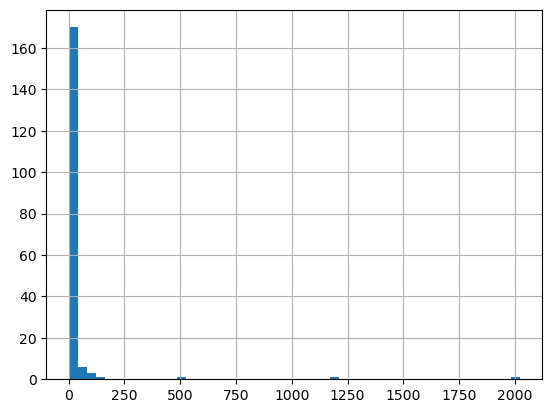

In [739]:
sharks7["country"].value_counts().hist(bins=50)
sharks7["country"].value_counts().describe()

freqlist=dict(sharks7["country"].value_counts())

In [748]:
keys_freq20 = [key for key, value in freqlist.items() if value < 20]

print(keys_freq20[:20])
len(keys_freq20)

['PACIFIC OCEAN', 'GREECE', 'TONGA', 'COSTA RICA', 'ATLANTIC OCEAN', 'VIETNAM', 'SOUTH ATLANTIC OCEAN', 'VANUATU', 'IRAQ', 'BERMUDA', 'SRI LANKA', 'TURKEY', 'FRANCE', 'VENEZUELA', 'MARSHALL ISLANDS', 'MAURITIUS', 'CANADA', 'NEW GUINEA', 'UNITED KINGDOM', 'SENEGAL']


154

In [741]:
BB=len(sharks7)
sharks7=sharks7[sharks7["country"]!="uncertain"]
sharks7=sharks7[sharks7["country"]!="nan"]
AA=len(sharks7)
print(f''' {BB-AA} rows dropped ''')

sharks7.reset_index(drop=True, inplace=True)

 49 rows dropped 


In [750]:
BB=len(sharks7)

for i in keys_freq20:
    sharks7=sharks7[sharks7["country"] != i]

AA=len(sharks7)
print(f''' {BB-AA} rows dropped ''')

sharks7.reset_index(drop=True, inplace=True)
sharks7["country"].value_counts()

 0 rows dropped 


USA                 2022
AUSTRALIA           1199
SOUTH AFRICA         509
PAPUA NEW GUINEA     131
NEW ZEALAND          114
BRAZIL               102
BAHAMAS              102
MEXICO                78
REUNION               60
FIJI                  59
PHILIPPINES           58
ITALY                 56
NEW CALEDONIA         52
CUBA                  40
MOZAMBIQUE            39
EGYPT                 37
INDIA                 35
SPAIN                 33
PANAMA                30
JAPAN                 29
SOLOMON ISLANDS       29
IRAN                  28
CROATIA               27
JAMAICA               24
HONG KONG             24
FRENCH POLYNESIA      23
ENGLAND               21
INDONESIA             21
Name: country, dtype: int64

###  Ignore columns:  area ,	location ,	activity, sex

### 4.7 Correct "age" column


* 4.7.1  Drop NAN's

* 4.7.2 Transform to "uncertain" the cells including NON DIGIT"

* 4.7.3 Drop "uncertain" values 

Keep it on-hold and continue cleaning other columns


In [854]:
sharks8=sharks7.copy()
AA=len(sharks8)

In [855]:
sharks8.head()

sharks8.dropna(subset=['age'], inplace=True)
sharks8.shape

BB=len(sharks8)
print(f''' {AA-BB} NaN rows dropped ''')

sharks8.reset_index(drop=True, inplace=True)

sharks8["age"].value_counts()

 2011 NaN rows dropped 


18          133
17          132
19          128
15          127
16          123
           ... 
45            1
21 or 26      1
20            1
>50           1
2½            1
Name: age, Length: 139, dtype: int64

In [927]:
sharks8["age"] = np.where(sharks8["age"].str.isdigit()==True, sharks8["age"],  "uncertain")
AA=len(sharks8)
sharks8=sharks8[sharks8["age"]!="uncertain"]
BB=len(sharks8)

print(f''' {AA-BB} non numeric rows dropped ''')

sharks8.reset_index(drop=True, inplace=True)

len(sharks8["age"])

 0 non numeric rows dropped 


2885

### 4.8 Correct "fatal_y_n" column


* 4.8.1 Transform to "UNKNOWN" the cells = " N", "M" and "2017"

* 4.8.2 Drop "UNKNOWN" values 

Keep it on-hold and continue cleaning other columns

In [869]:
sharks9=sharks8.copy()

In [930]:
sharks9["fatal_y_n"].value_counts()
sharks9["fatal_y_n"]=sharks9["fatal_y_n"].str.replace(" N", "UNKNOWN")
sharks9["fatal_y_n"]=sharks9["fatal_y_n"].str.replace("M", "UNKNOWN")
sharks9["fatal_y_n"]=sharks9["fatal_y_n"].str.replace("2017", "UNKNOWN")
sharks9 = sharks9[sharks9["fatal_y_n"]!="UNKNOWN"]
display(sharks9["fatal_y_n"].value_counts())
sharks9.shape

N    2361
Y     505
Name: fatal_y_n, dtype: int64

(2869, 24)

<span style="font-size:18px; color: #e74c3c"><b> AT THIS POINT I HAVE A RELATIVELY CLEAN DATAFRAME WITH: 2869 rows and 24 columns!!
    
LAST CLEANING PROCESSES WITHOUT DROPING ROWS:

* 4.9 Clean misspelled SEX column
    
* 4.10 Transform to " " long ACTIVITY descriptions (i.e., > word by cell)
    
* 4.11 Clean "time" column by replacing "h" for nothing and keeping only values with 4 digits 
  
* 4.12 Clean "injury" column to keep only the top 5 types of lessions
    
    
I WILL IGNORE THE FOLLOWING COLUMNS:
Reason: too dirty or uninformative
   
    time 	specie 	investigator_or_source 	pdf 	href_formula 	href
    
    
TO CONCLUDE I WILL:
    
* 4.13 Transform redundant columns into constant NA columns
    
        case_number case_number_1 case_number_2 unnamed_22 unnamed_23

* 4.14 Downcast the dataframe to decrease memory use
    
* Save this file as first task ---> data/sharks_clean1.csv


### 4.9 Clean misspelled SEX column

In [934]:
sharks10=sharks9.copy()


In [941]:
sharks10["sex"].unique()
sharks10["sex"]=sharks10["sex"].str.replace("M ", "M")
sharks10["sex"]=sharks10["sex"].str.replace("lli", "UNKNOWN")
sharks10["sex"]=sharks10["sex"].str.replace("nan", "UNKNOWN")
sharks10 = sharks10[sharks10["sex"]!="UNKNOWN"]
sharks10["sex"].value_counts()

M    2472
F     373
Name: sex, dtype: int64

### 4.10 Clean long ACTIVITY descriptions (i.e., > word by cell)

In [978]:
sharks11=sharks10.copy()
sharks11["activity"].value_counts()

Surfing                                                         716
Swimming                                                        441
Spearfishing                                                    177
Wading                                                          106
Fishing                                                          99
                                                               ... 
On a float                                                        1
Abalone diving using Hookah (resting on the surface)              1
Abalone diving using Hookah (near calving whales)                 1
Playing / standing                                                1
Fishing from dory, shark upset boat & he fell into the water      1
Name: activity, Length: 599, dtype: int64

In [981]:
sharks11["activity"][sharks11["activity"].str.contains(" ")| sharks11["activity"].isna()]=np.nan
sharks11["activity"].value_counts().head()

Surfing         716
Swimming        441
Spearfishing    177
Wading          106
Fishing          99
Name: activity, dtype: int64

### 4.11 Clean "time" column 

In [986]:
sharks11=sharks10.copy()
sharks11["time"].unique()[:20]

array(['18h00', '14h00  -15h00', 'Late afternoon', nan, '17h00', '14h00',
       'Morning', '15h00', '09h30', '09h40', '08h00', '17h35', '15h30',
       '07h30', '19h00, Dusk', 'Night', '16h00', '12h00', '13h45',
       '23h30'], dtype=object)

In [993]:
sharks11["time"]=sharks11["time"].str.replace("h", "")
sharks11["time"]=sharks11["time"].str.replace("-", "")
sharks11["time"]=sharks11["time"].str.replace("Nigt", "") #strings of 4 letters
sharks11["time"]=sharks11["time"].str.replace("A.M.", "") #strings of 4 letters
sharks11["time"]=sharks11["time"].str.replace("P.M.", "") #strings of 4 letters
sharks11["time"]=sharks11["time"].str.replace("Dusk", "") #strings of 4 letters

sharks11["time"].unique()

alist=list(sharks11["time"])
tehres=[len(str(x))!=4 for x in alist]

sharks11["time"][tehres]=np.nan
sharks11["time"].unique()[:20]

,original_order,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_y_n,time,specie,investigator_or_source,pdf,href_formula,href,case_number,case_number_1,case_number_2,unnamed_22,unnamed_23
0,6303,25-Jun-2018,2018.0,Boat,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,1800,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,2018.06.25,NaN,NaN
1,6302,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,NaN,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,2018.06.18,NaN,NaN
2,6297,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,NaN,Tiger shark,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,2018.06.03.a,NaN,NaN
3,6296,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N,NaN,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,2018.05.27,NaN,NaN
4,6295,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten,N,1700,"Bull shark, 6'","K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.b,2018.05.26.b,2018.05.26.b,NaN,NaN


### 4.12 Clean "injury" column to keep only the top 5 types of lessions

In [1002]:
sharks12=sharks11.copy()

In [1010]:
theinj=list(sharks12["injury"].value_counts()[:5].index)
theinj

new_inj=[]
for i in sharks12["injury"]:
    if i not in theinj:
        new_inj.append(np.nan)
    elif i in theinj:
        new_inj.append(i)
    else:
        pass

sharks12["injury"]=new_inj

0         NaN
1         NaN
2       FATAL
3         NaN
4         NaN
        ...  
2880      NaN
2881      NaN
2882    FATAL
2883      NaN
2884      NaN
Name: injury, Length: 2869, dtype: object

### 4.13 Transform redundant columns into constant NA columns

In [1016]:
sharks13=sharks12.copy()

sharks13[["case_number", "case_number_1" ,"case_number_2", "unnamed_22", "unnamed_23"]] = np.nan

### Last check on NA's distribution

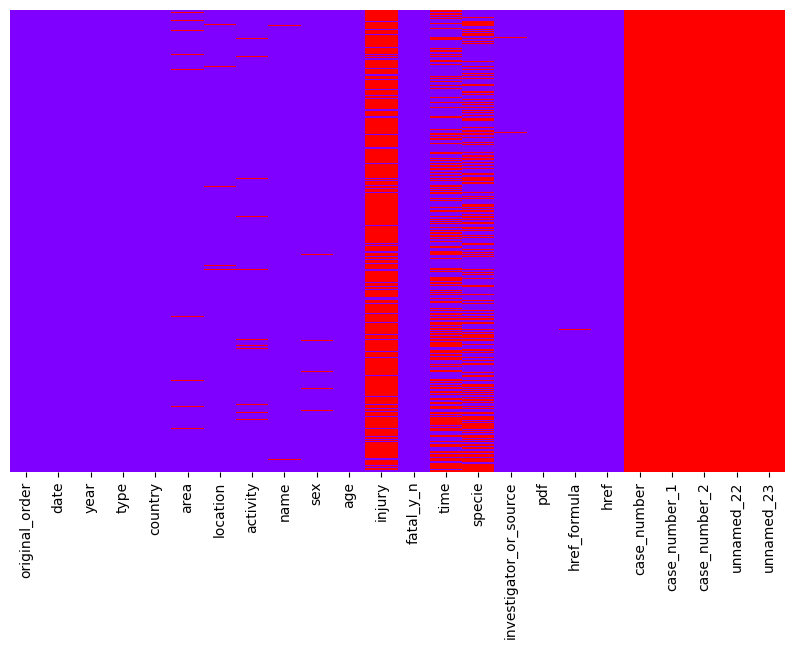

In [1017]:
mlg.na_heatmap(sharks13)

I WOULD CLEARLY DROP MULTIPLE COLUMNS AND EVEN ROWS BUT THE EXERCICE ASKS TO KEEP 24 COLUMNS AND 2500 ROWS

### 4.14 Downcast the dataframe to decrease memory use

In [1021]:
sharks_clean=sharks13.copy()

sharks_clean=mlg.reduc_mem(sharks_clean)

AA=sharks13.memory_usage().sum()/ 1024  # Convert bytes to kilobytes
BB=sharks_clean.memory_usage().sum()/ 1024  # Convert bytes to kilobytes

print("\n")
print('By downcasting the dataframe we saved: ', AA - BB, "memory Kbs")
print("\n")

display(sharks13.info(memory_usage='deep'))
display(sharks_clean.info(memory_usage='deep'))




By downcasting the dataframe we saved:  -309.25390625 memory Kbs


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2869 entries, 0 to 2884
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   original_order          2869 non-null   Int64  
 1   date                    2869 non-null   object 
 2   year                    2869 non-null   float64
 3   type                    2868 non-null   object 
 4   country                 2869 non-null   object 
 5   area                    2823 non-null   object 
 6   location                2788 non-null   object 
 7   activity                2779 non-null   object 
 8   name                    2864 non-null   object 
 9   sex                     2846 non-null   object 
 10  age                     2869 non-null   object 
 11  injury                  401 non-null    object 
 12  fatal_y_n               2866 non-null   object 
 13  time                    

None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2869 entries, 0 to 2884
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   original_order          2869 non-null   Int64   
 1   date                    2869 non-null   category
 2   year                    2869 non-null   float32 
 3   type                    2868 non-null   category
 4   country                 2869 non-null   category
 5   area                    2823 non-null   category
 6   location                2788 non-null   category
 7   activity                2779 non-null   category
 8   name                    2864 non-null   category
 9   sex                     2846 non-null   category
 10  age                     2869 non-null   category
 11  injury                  401 non-null    category
 12  fatal_y_n               2866 non-null   category
 13  time                    1743 non-null   category
 14  specie                  

None

NameError: name 'to_csv' is not defined

In [1024]:
sharks_clean.to_csv('../data/sharks_clean.csv', index=False)

I usually comment the line code used to save the file as safety measure to avoid overwriting issues